# **Roman Urdu Text Recognition**

---



## **Project Overview**
This project involves text extraction using Optical Character Recognition (OCR), followed by a module that determines if the extracted text is in Roman Urdu.

## Group Members:

*   Muneeza Iftikhar (ID: 02-136212-012)
*   Hafsa Hafeez Siddiqui (ID: 02-136212-026)




## Installing libraries and mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 26.3 MB/s eta 0:00:00


## Live/Webcam Detection
This code captures an image from the user’s webcam in Google Colab using JavaScript and Python. It displays a live video feed, allows the user to capture a photo, and saves the captured image as a `.jpg` file locally.

In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [8]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  # Create a folder to save the images
  folder_path = '/content/captured_images'
  if not os.path.exists(folder_path):
    os.makedirs(folder_path)

  # Save the captured image in the folder
  with open(os.path.join(folder_path, filename), 'wb') as f:
    f.write(binary)

  return os.path.join(folder_path, filename)

## Preprocessing

Basic Preprocessing Steps include:

* **Convert to Grayscale** : The image is converted from color to grayscale to reduce complexity and focus on text or shape features.
*   **Sharpening**: The image is sharpened to enhance edges and improve clarity, making features more distinct for text recognition.
*   **Resizing**: The image is resized to a fixed dimension (400x300) to standardize input size, which can help improve processing consistency.






In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os
from PIL import Image, ImageEnhance, ImageFilter

In [12]:
def apply_preprocessing(filename):
    # Open the image file.
    with Image.open(filename) as img:
        # Convert the image to greyscale.
        grey_img = img.convert('L')

        # Sharpen the image.
        sharp_img = grey_img.filter(ImageFilter.SHARPEN)

        # Resize the image.
        resized_img = sharp_img.resize((400, 300))

        # Save the pre-processed image.
        resized_img.save(os.path.join(os.path.dirname(filename), 'preprocessed_'
                                      + os.path.basename(filename)))

<IPython.core.display.Javascript object>

Image saved to /content/captured_images/photo.jpg
Captured Image:


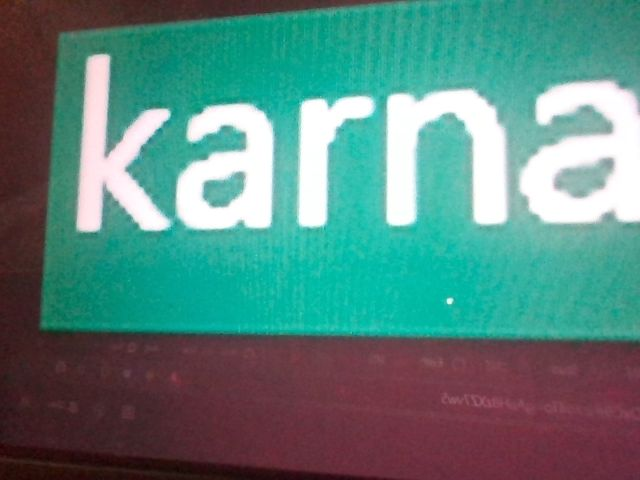

Preprocessed image saved as /content/captured_images/preprocessed_photo.jpg
Preprocessed Image:


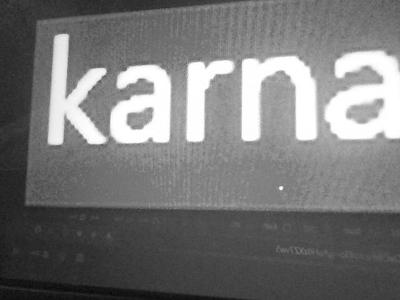

In [13]:
from IPython.display import display, Image as IPImage

try:
    # Capture and save the photo
    filename = take_photo()
    print(f'Image saved to {filename}')

    # Display the captured image with a label
    print("Captured Image:")
    display(IPImage(filename))

    # Apply preprocessing on the captured image and save the result
    preprocessed_filename = os.path.join(os.path.dirname(filename), f'preprocessed_{os.path.basename(filename)}')
    apply_preprocessing(filename)
    print(f'Preprocessed image saved as {preprocessed_filename}')

    # Display the preprocessed image with a label
    print("Preprocessed Image:")
    display(IPImage(preprocessed_filename))

except Exception as err:
    # Handle errors (e.g., if webcam access is denied or unavailable)
    print(f"Error: {err}")


## Text Extraction
Breakdown of the OCR process using EasyOCR in bullet points:

* **Load Image**: The image `(saved as photo.jpg)` is loaded from the specified path.
* **Initialize OCR Reader**: An EasyOCR reader is initialized for English `(en)` text recognition.
* **Text Extraction**: OCR is applied to the image, extracting text line by line.
* **Text Concatenation**: Extracted text from each line is joined into a single string for easy reading.
* **Display Result**: The extracted text is printed for review.

In [14]:
from PIL import Image, ImageFilter
import easyocr
import os

In [15]:
image_path = '/content/captured_images/photo.jpg'

def extract_text_easy_ocr(image_path):
    # Perform OCR
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)
    text = ' '.join([line[1] for line in result])

    # Return the extracted text
    return text

def run_easy_ocr(image_path):
    extracted_text = extract_text_easy_ocr(image_path)
    print(f'Extracted Text: ' + extracted_text)

# Run OCR on the captured image
run_easy_ocr(image_path)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Text: karna


## Preprocessing of Urdu Dictonary
* **Load the Dictionary**: Open the file and read each line.
* **Clean and Process Entries**: Remove whitespace, convert to lowercase, split entries on the first colon, remove punctuation, and split multiple meanings using slashes and commas.
* **Remove Duplicates**: Convert the cleaned entries to a set to ensure uniqueness.
* **Organize Data**: Create a dictionary where each word maps to a list of its unique meanings.

In [26]:
file_path = '/content/drive/MyDrive/Roman-Urdu-Dictionary.txt'

In [18]:
import re
import string

In [19]:
def preprocess_dictionary(file_path):
    # Step 1: Load the dictionary
    with open(file_path, 'r', encoding='utf-8') as f:
        roman_urdu_dict = f.readlines()

    # Step 2: Clean and process each entry
    cleaned_dict = []
    for entry in roman_urdu_dict:
        entry = entry.strip().lower()  # Remove whitespace and convert to lowercase
        parts = entry.split(':', 1)  # Split on the first colon only
        if len(parts) == 2:
            word, meanings = parts
            word = word.strip().translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
            meanings_list = [meaning.strip() for meaning in re.split(r'[/,]', meanings)]  # Split meanings on slashes and commas
            for meaning in meanings_list:
                cleaned_dict.append((word, meaning))

    # Step 3: Remove duplicate entries
    unique_entries = set(cleaned_dict)

    # Step 4: Organize the data into a dictionary
    organized_dict = {}
    for word, meaning in unique_entries:
        if word in organized_dict:
            organized_dict[word].add(meaning)
        else:
            organized_dict[word] = {meaning}

    # Convert sets to lists for easier usage
    for word in organized_dict:
        organized_dict[word] = list(organized_dict[word])

    return organized_dict

In [27]:
# Example usage:
preprocessed_dict = preprocess_dictionary(file_path)
print(preprocessed_dict)

{'fitrat': ['deceit', 'nature', 'wisdom', 'intrigue', 'creation'], 'mahfil': ['assembly', 'congregation'], 'mulaaim': ['tender', 'soft', 'gentle', 'placid'], 'fahm': ['intellect', 'understanding'], 'yagaanah': ['single', 'agreed', 'unequalled', 'sole', 'kinsman', 'unique', 'kindred'], 'bas': ['sufficient', 'enough', 'plenty'], 'matin': ['solid', 'strong', 'obstinate', 'vigorous'], 'qaafiyah': ['rhyme', 'cadence', 'metre'], 'safed': ['white'], 'bayaabaan': ['desert', 'wilderness'], 'magar': ['perhaps', 'unless', 'except', 'however', 'but'], 'ham nasheen': ['associate', 'playmate'], 'raahat': ['comfort', 'rest', 'repose', 'ease', 'tranquility'], 'agar': ['if', 'in case'], 'ishaarah': ['sign', 'symbol', 'wink', 'gesture'], 'subh': ['morning', 'dawn'], 'zor': ['influence', 'power', 'stress', 'strength', 'force'], 'bad naseeb': ['unfortunate', 'unlucky'], 'farishtah': ['apostle', 'angel', 'prophet', 'messenger'], 'maayoos': ['disappointed', 'without hope'], 'qaum': ['nation', 'people'], 'we

## Roman Urdu Module

To create the Roman Urdu module, we utilized a Roman Urdu text recognition dictionary, [Roman Urdu Dictionary](https://img.shields.io/github/repo-size/Smat26/Roman-Urdu-Dataset.svg), which maps each captured word to its dictionary entry and outputs the extracted text in both English and Urdu.

In [20]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [21]:
import glob
import os
from PIL import Image
import nltk
from nltk.corpus import words

with open(file_path, 'r') as file:
    roman_urdu_words_set = set(line.strip() for line in file)

In [22]:
from nltk.corpus import words

def run_easy_ocr(image_path):
    """
    Run OCR on an image and classify words as Roman Urdu or English.
    Args:
        image_path (str): The path to the image for OCR processing.
    Returns:
        None
    """
    # Load English dictionary
    english_words = set(words.words())

    # Lists to store extracted Roman Urdu and English words
    all_roman_urdu_words = []
    all_english_words = []

    # Perform OCR on the image
    extracted_text = extract_text_easy_ocr(image_path)
    words_in_text = extracted_text.split()  # Split extracted text into words

    # Separate words into Roman Urdu and English
    roman_urdu_words = []
    english_words_in_text = []

    for word in words_in_text:
        if word.lower() in roman_urdu_words_set or word.lower() not in english_words:
            roman_urdu_words.append(word)  # Likely Roman Urdu
        else:
            english_words_in_text.append(word)  # Recognized as English

    # Display extracted text and classifications
    print(f'Extracted Text: {extracted_text}')
    print(f'Roman Urdu Words: {roman_urdu_words}')
    print(f'English Words: {english_words_in_text}')

    # Add to the main lists
    all_roman_urdu_words.extend(roman_urdu_words)
    all_english_words.extend(english_words_in_text)

In [23]:
run_easy_ocr(image_path)

Extracted Text: karna
Roman Urdu Words: ['karna']
English Words: []
